In [1]:
# Install mediapipe to work with
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [2]:
# Import necessary libraries
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [3]:
# Opens video, reads it frame by frame, writes frame number and coordinates of chosen point (nose, in this example)
# to a pandas dataframe and loads the result file.

from google.colab.patches import cv2_imshow
import pandas as pd

df = pd.DataFrame(columns=['frame', 'x', 'y', 'z', 'visibility'])

cap = cv2.VideoCapture("Squat.mp4")  #if fe want webcam input set 0
with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # continue if it is a live-video
      break

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image)

    # Draw the pose annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

    x = results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].x
    y = results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].y
    z = results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].z
    v = results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].visibility

    cur_num = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
    df.loc[len(df.index)] = [cur_num, x, y, z, v]

    if cv2.waitKey(5) & 0xFF == 27:
      break

df.to_csv('squats.csv')
display(df)
cap.release()

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/usr/local/lib/python3.10/dist-packages/google/protobuf/sy

Ignoring empty camera frame.


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/usr/local/lib/python3.10/dist-packages/google/protobuf/sy

frame         x         y         z  visibility
0      1.0  0.155404  0.396094 -0.058468    0.997558
1      2.0  0.152084  0.396122 -0.067228    0.997637
2      3.0  0.149617  0.396102 -0.071331    0.997726
3      4.0  0.149075  0.395972 -0.072877    0.997788
4      5.0  0.149122  0.396519 -0.072564    0.997811
..     ...       ...       ...       ...         ...
238  239.0  0.158687  0.399358 -0.058288    0.987220
239  240.0  0.164311  0.401808 -0.053542    0.988240
240  241.0  0.168177  0.403845 -0.049864    0.989180
241  242.0  0.166996  0.401938 -0.056036    0.990057
242  243.0  0.166126  0.399577 -0.060906    0.990863

[243 rows x 5 columns]

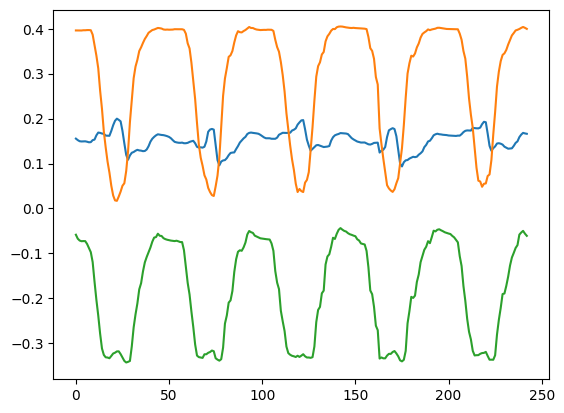

In [4]:
# Display a graph of each coordinate depending on the frame
import matplotlib.pyplot as plt

df['x'].plot(label='x') # blue
df['y'].plot(label='y') # orange
df['z'].plot(label='z') # green
plt.show()

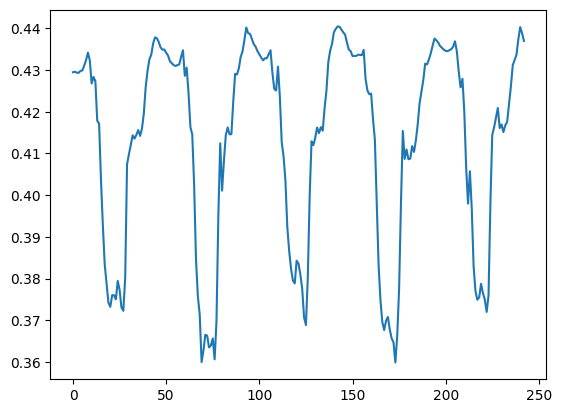

In [5]:
# Shows "summary" coordinate

import numpy as np

df['xyz'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)
df['xyz'].plot()
plt.show()

In [6]:
# To not save extra column
df = df.set_index('frame')

<ipython-input-7-2f809a4e1244>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice['x'] = savgol_filter(df_slice['x'], 40, 2)
<ipython-input-7-2f809a4e1244>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice['y'] = savgol_filter(df_slice['y'], 40, 2)
<ipython-input-7-2f809a4e1244>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

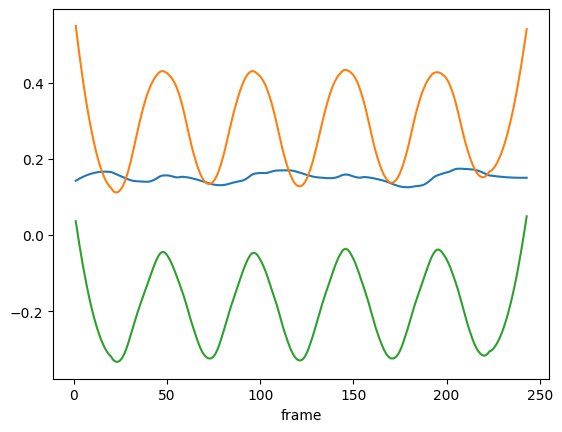

In [7]:
# Use the Savitzky-Golay smoothing method for graphs of each coordinate

from scipy.signal import savgol_filter
df_slice = df[['x', 'y', 'z']]

df_slice['x'] = savgol_filter(df_slice['x'], 40, 2)
df_slice['y'] = savgol_filter(df_slice['y'], 40, 2)
df_slice['z'] = savgol_filter(df_slice['z'], 40, 2)

df_slice['x'].plot()
df_slice['y'].plot()
df_slice['z'].plot()
plt.show()

In [8]:
# Finds local extremes
from scipy.signal import argrelextrema

x = df_slice.reset_index()['x'].values
y = df_slice.reset_index()['y'].values
z = df_slice.reset_index()['z'].values

# Finding extrema for each coordinate (min-max) (frame numbers)
x_max = argrelextrema(x, np.greater)[0]
y_max = argrelextrema(y, np.greater)[0]
z_max = argrelextrema(z, np.greater)[0]

x_min = argrelextrema(x, np.less)[0]
y_min = argrelextrema(y, np.less)[0]
z_min = argrelextrema(z, np.less)[0]

# Combining the minimums and maximums into one array for each (frame numbers)
x_extr = np.sort(np.concatenate([x_max, x_min]))
y_extr = np.sort(np.concatenate([y_max, y_min]))
z_extr = np.sort(np.concatenate([z_max, z_min]))

print(x_extr)
print(y_extr)
print(z_extr)

[ 16  38  49  54  57  77  99 101 113 136 145 152 155 178 206 239]
[ 22  46  72  95 120 145 169 194 218]
[ 22  47  72  96 120 145 170 194 219]


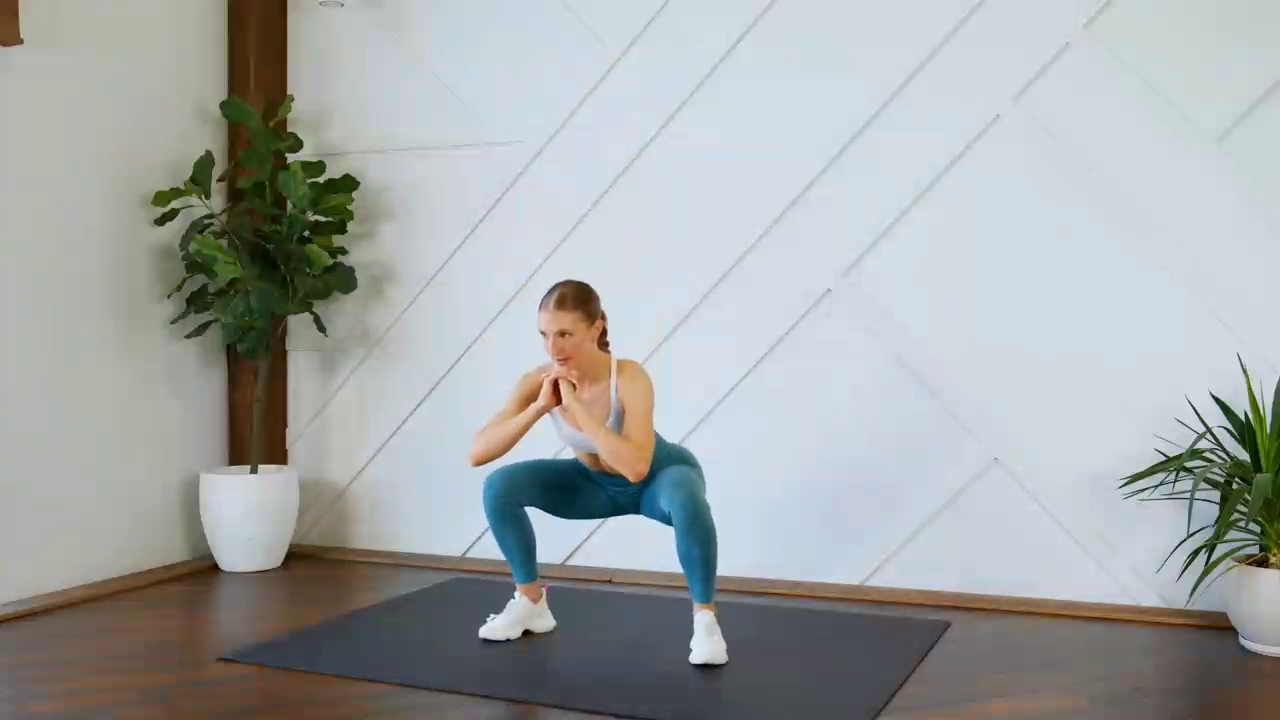

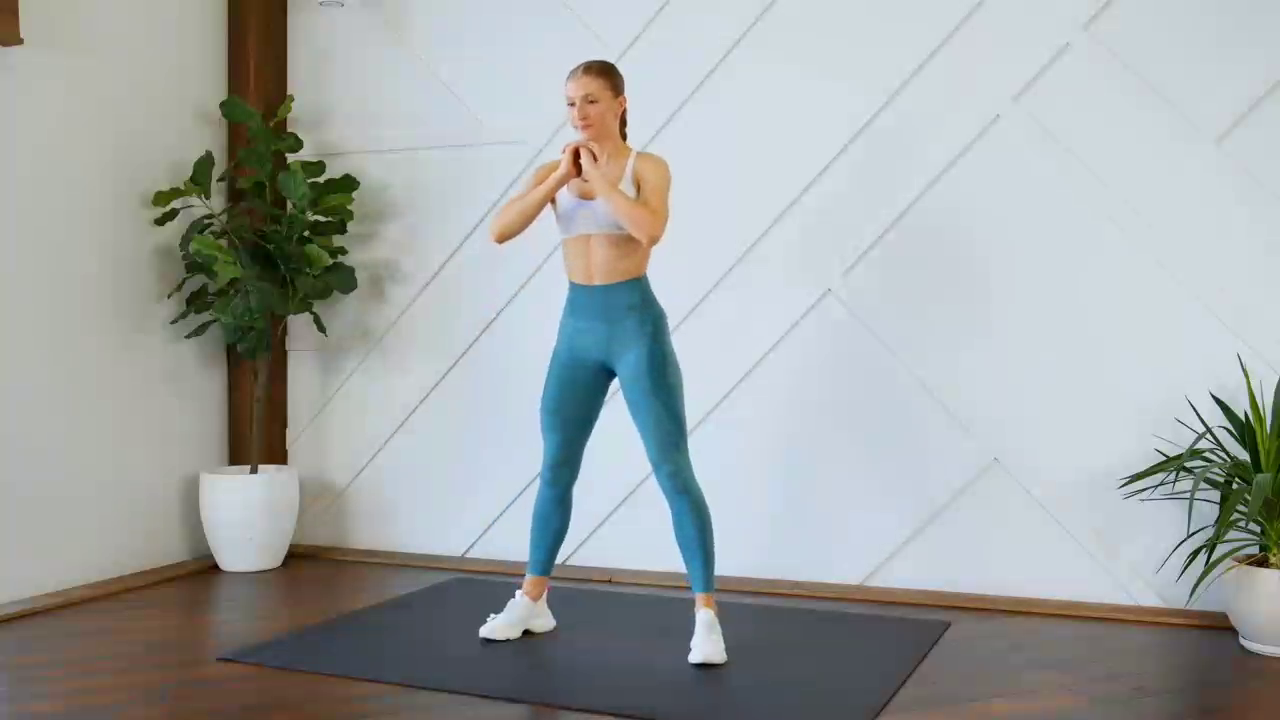

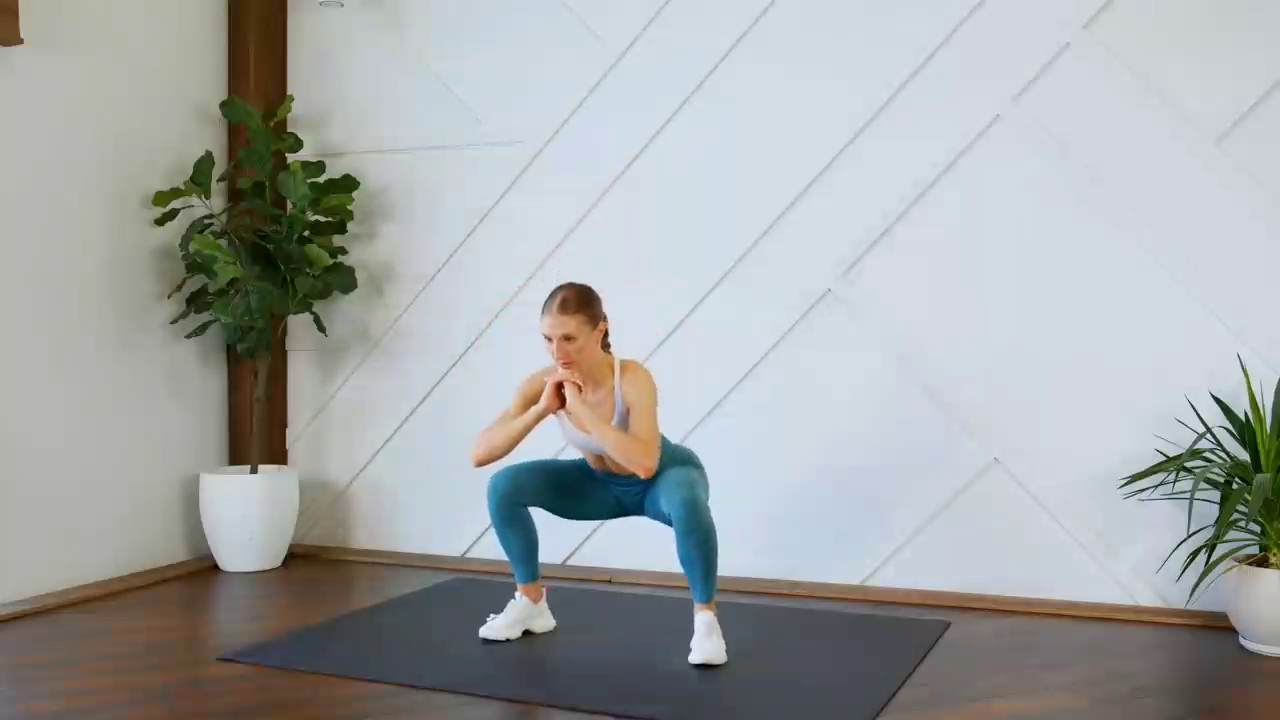

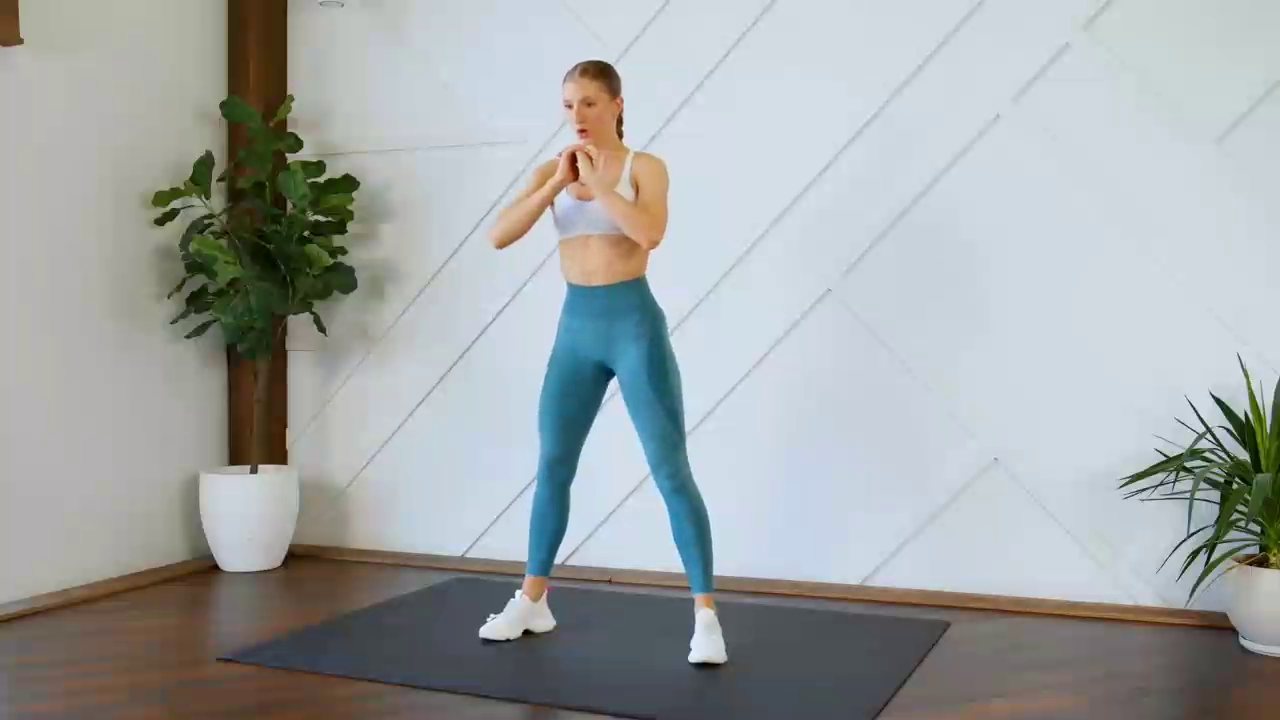

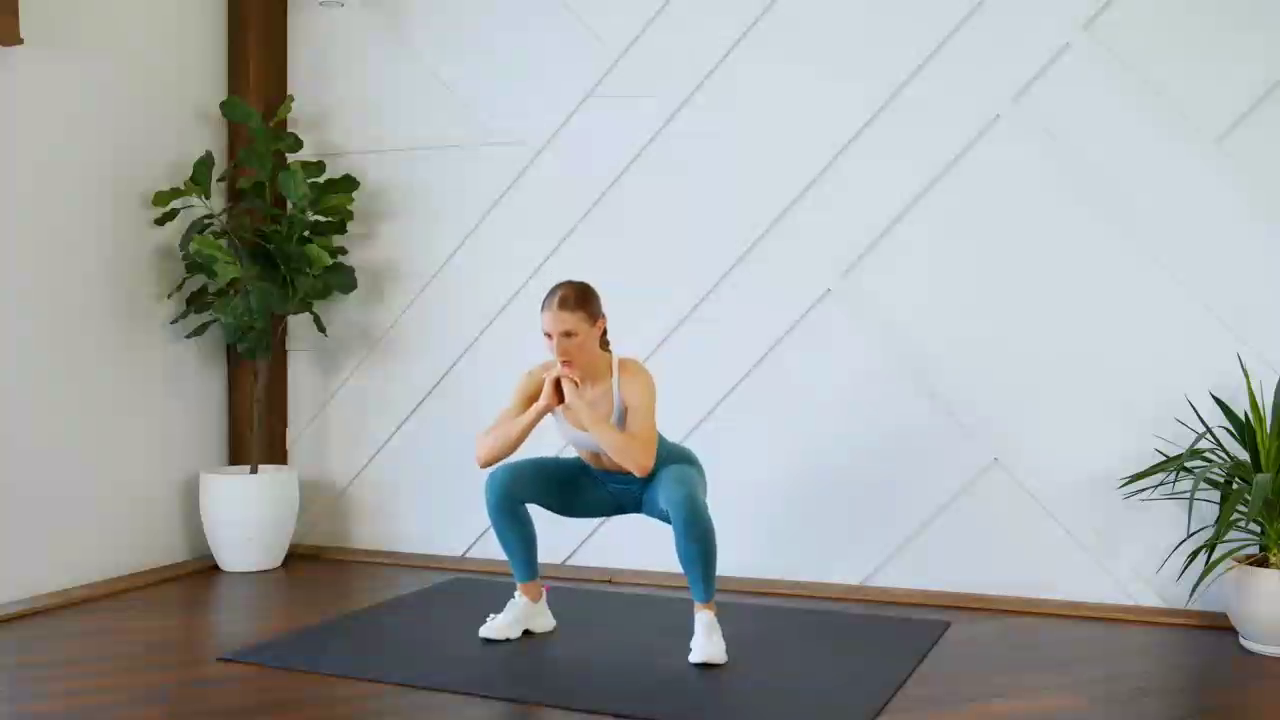

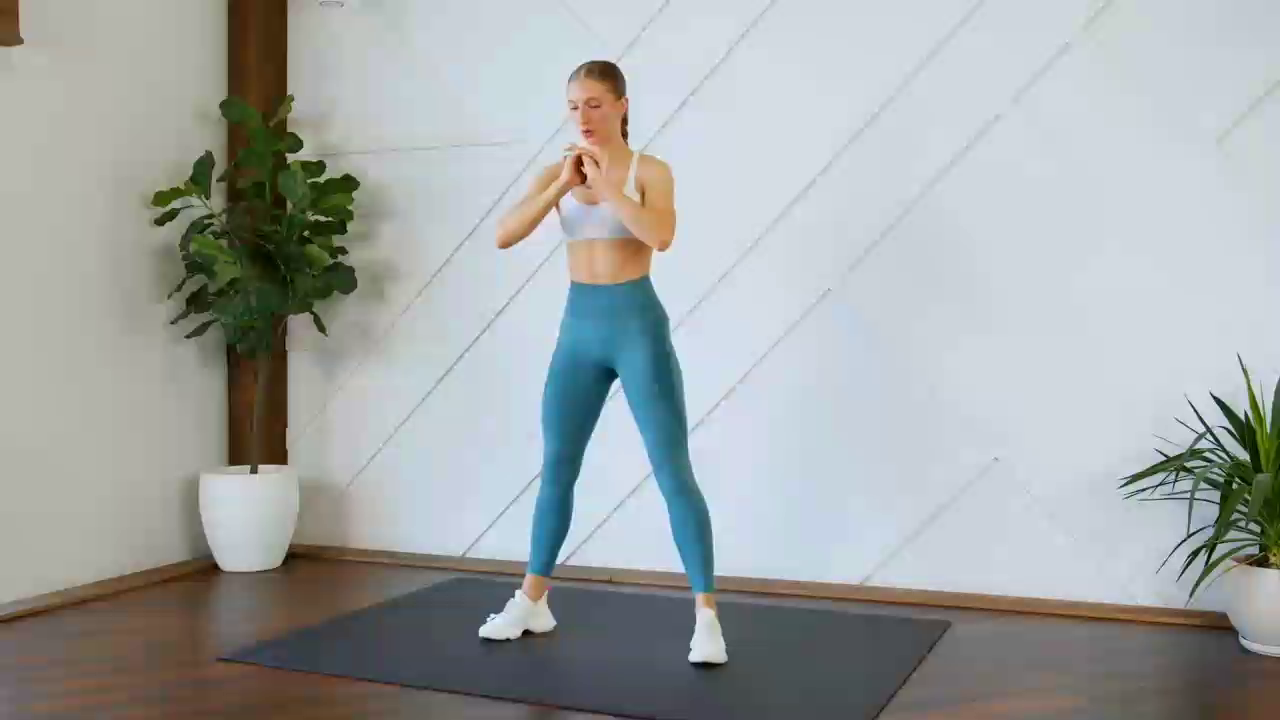

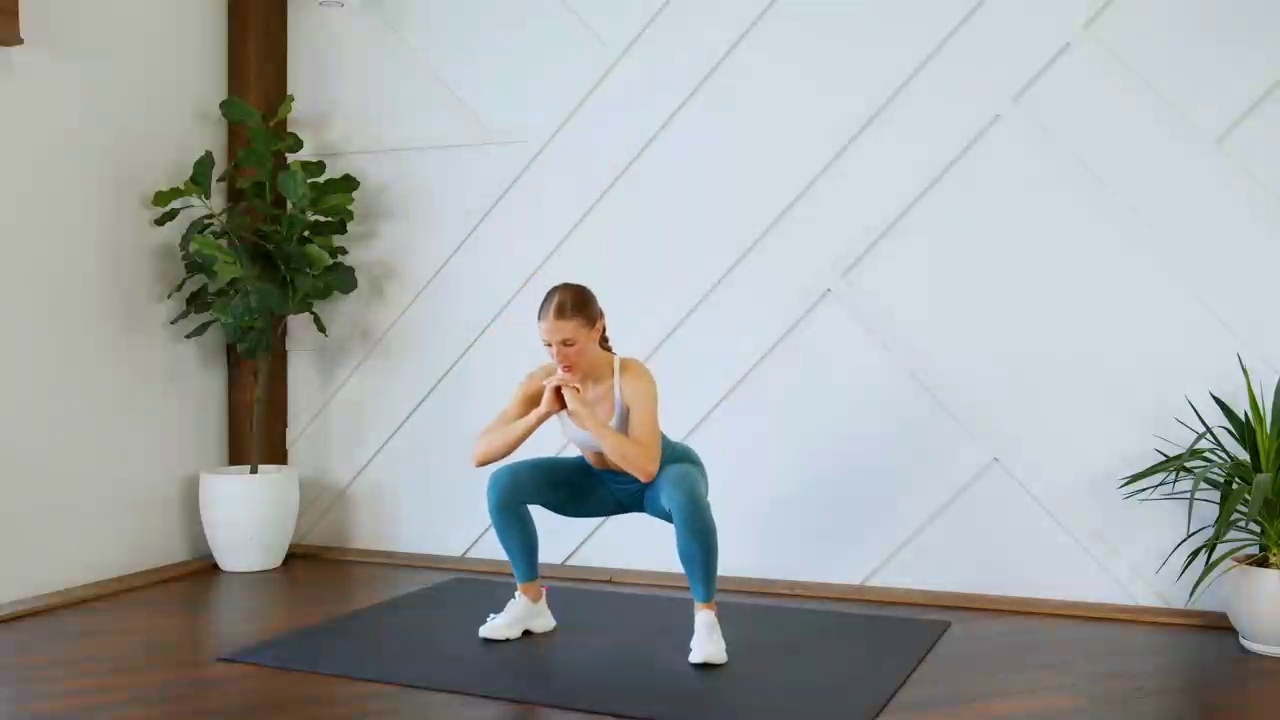

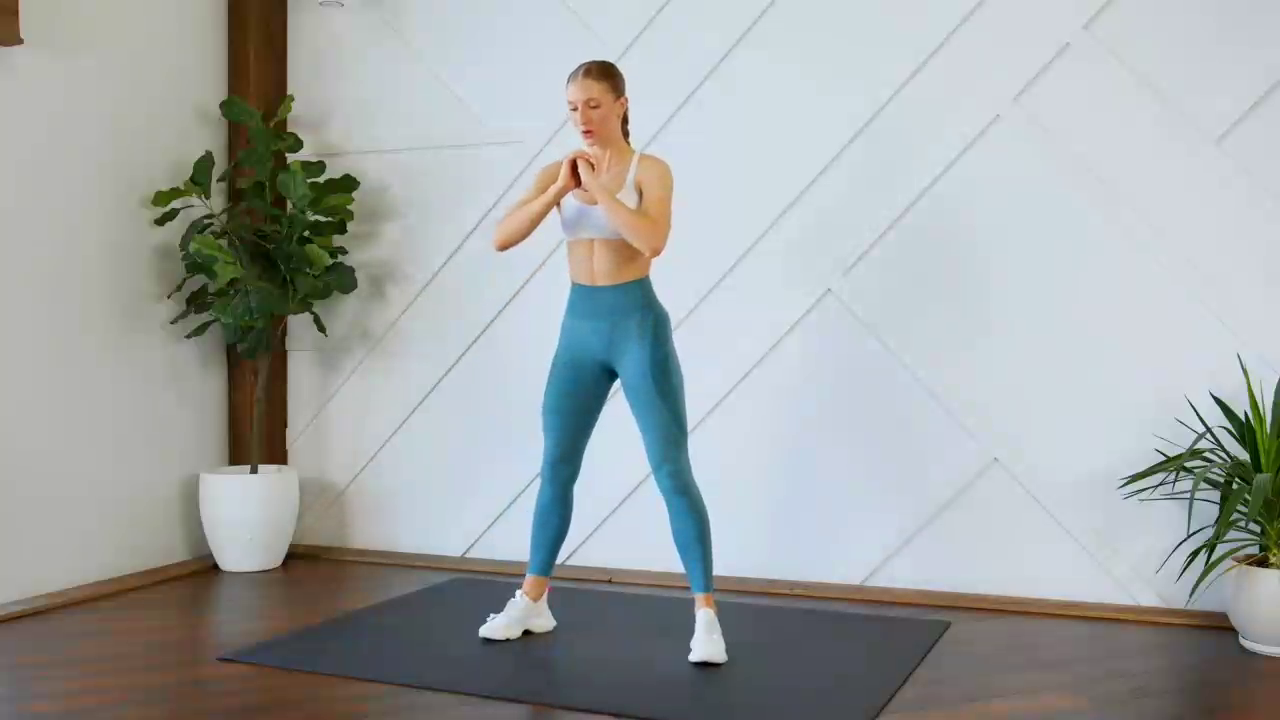

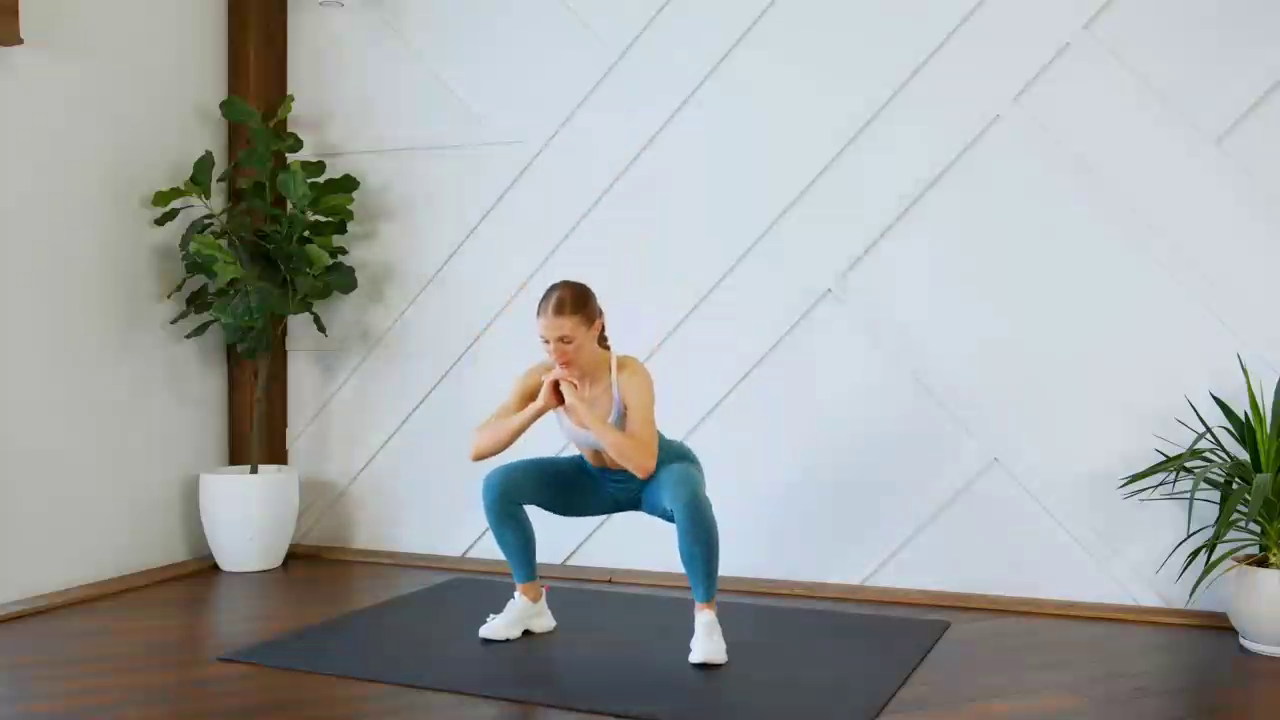

In [9]:
# Looking for which coordinate has the largest average amplitude
# Then chose frames on local extremes by this coordinate

# Saving frames under numbers that are in the res_extr array
def out_frames (res_extr):
  cap = cv2.VideoCapture("Squat.mp4")
  for i in range(len(res_extr)):
    cap.set(1, res_extr[i])
    ret, frame = cap.read()
    cv2_imshow(frame)
    cv2.imwrite("frame%d.jpg" % (i+1), frame)

# Finding coordinates using frame numbers at extreme points
x_coordinates = df.loc[x_extr]['x'].values
y_coordinates = df.loc[y_extr]['y'].values
z_coordinates = df.loc[z_extr]['z'].values

# Finding the average difference in coordinates between two adjacent frames (average amplitude)
res_x = np.mean(abs(np.diff(x_coordinates)))
res_y = np.mean(abs(np.diff(y_coordinates)))
res_z = np.mean(abs(np.diff(z_coordinates)))

# For which coordinate this value is maximum, then we save frames with the specified coordinates
res_max = max(res_x, max(res_y, res_z))
if res_max == res_x:
  out_frames(x_extr)
elif res_max == res_y:
  out_frames(y_extr)
else:
  out_frames(z_extr)